In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

def adjust_fontsize(ax):
    for ax in ax:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] 
                     + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(14)  

In [2]:
all_data = np.concatenate((iris.data, iris.target.reshape(150, 1)), axis=1)
np.random.shuffle(all_data)
x = all_data[:100, :4]
y = all_data[:100, 4].astype(int)

xt = all_data[100:, :4]
yt = all_data[100:, 4].astype(int)

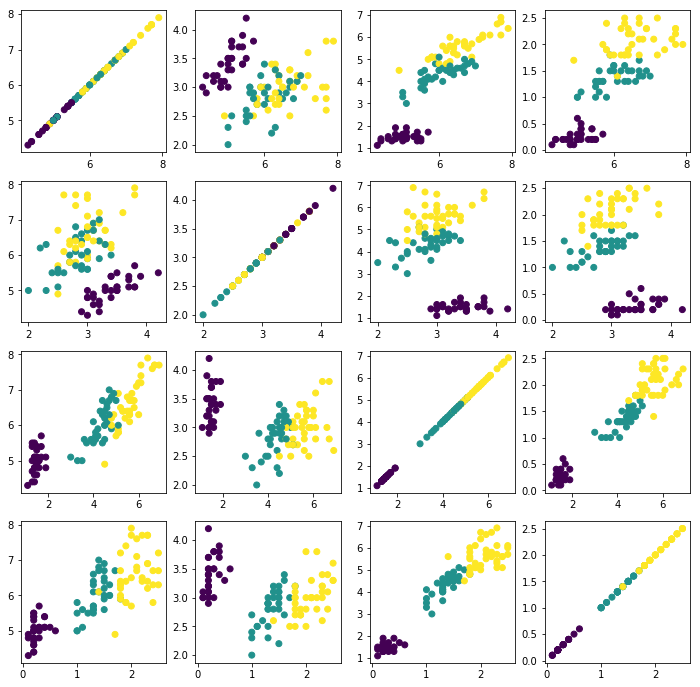

In [3]:
fig, ax = plt.subplots(4,4,figsize=(12,12))

for i in range(4):
    for j in range(4):
        ax[i, j].scatter(x[:, i], x[:, j], c=y, marker='o')

plt.show()

In [4]:
def relu(x):
    return x * (x > 0)

def softmax(x):
    
    return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(x.shape[0], 1)


class MLP():
    def __init__(self, h1):
        self.h1 = h1
        self.w1 = np.random.rand(h1, 4)
        self.w2 = np.random.rand(3, h1)
        self.b1 = np.zeros(h1, None)
        self.b2 = np.zeros(3, None)
    
    def forward(self, xx):
        self.ha = xx.dot(self.w1.T) + self.b1
        self.hs = relu(self.ha)
        self.oa = self.hs.dot(self.w2.T) + self.b2         
        self.os = softmax(self.oa)
        
        return self.os
  
    def loss(self, xx, yy):
        return np.choose(yy[None, :], -np.log(self.forward(xx).T))

    def backward(self, xx, yy):
        self.grad_oa = (self.os - np.eye(3)[yy])
        self.grad_w2 = self.grad_oa.T.dot(self.hs)
        self.grad_b2 = np.sum(self.grad_oa, axis=0)
        self.grad_hs = self.grad_oa.dot(self.w2)
        self.grad_ha = np.where(self.ha > 0, self.grad_hs , 0)
        self.grad_w1 = self.grad_ha.T.dot(xx)
        self.grad_b1 = np.sum(self.grad_ha, axis=0)
        self.grad_x = np.sum(self.grad_ha.dot(self.w1), axis=1)

        return self.grad_oa, self.grad_w2, self.grad_b2, self.grad_hs, self.grad_ha, self.grad_w1, self.grad_b1, self.grad_x
    
    def update(self, eta):
        self.w1 = self.w1 - eta*self.grad_w1
        self.b1 = self.b1 - eta*self.grad_b1
        self.w2 = self.w2 - eta*self.grad_w2
        self.b2 = self.b2 - eta*self.grad_b2
        
        

In [5]:
model = MLP(10)

In [6]:
print('Finite difference')
print('=================')
eps = 1e-5
grad_x = (model.loss(x + eps, y) - model.loss(x, y))/1e-5
print(grad_x[:, :5])

print()

print('Backpropagation')
print('=================')

grad_oa, grad_w2, grad_b2, grad_hs, grad_ha, grad_w1, grad_b1, grad_x = model.backward(x, y)
print(grad_x[:5])


print()
print('They are the same! ')
print()

Finite difference
[[ 0.66029868 -0.04169767  0.65499128 -0.03705604  0.66468334]]

Backpropagation
[ 0.66029864 -0.0416978   0.65499122 -0.03705616  0.66468331]

They are the same! 



In [7]:
# could do minibatch instead. 
losses = []
for i in range(10000):
    output = model.forward(x)
    pred = np.argmax(output, axis=1)
    loss = np.sum(model.loss(x, y))

    grads = model.backward(x, y)
    model.update(0.0001)
    losses.append(loss)
    if i%1000==0:
        print(loss)

660.7941051300564
15.458358951966375
10.071207699714972
8.471071546467828
7.695531014263938
7.218713924602565
6.883246786767003
6.626266124721363
6.417569189869888
6.240771393038123


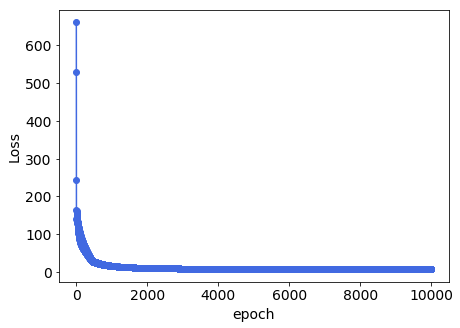

In [8]:
fig = plt.figure(figsize=(7, 5))
plt.plot(losses, 'o-', color='royalblue')
plt.xlabel('epoch')
plt.ylabel('Loss')
adjust_fontsize(fig.axes)
plt.show()

In [9]:
output = model.forward(xt)
pred_t = np.argmax(output, axis=1)
print('Test accuracy: {}%'.format(100*(1-(np.sum(np.abs(pred_t - yt))/yt.shape[0]))))

Test accuracy: 96.0%
